In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 10, 62, Finished, Available, Finished)

**FIRST DATASET**

In [2]:
#load and print dataset

heart = pd.read_csv("Users/amohammad4/heart_statlog_cleveland_hungary_final.csv")  
print(heart) 


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 10, 7, Finished, Available, Finished)

      age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0     

In [3]:
print(heart.info())
print(heart.head())

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 10, 8, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB
None
   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289

In [4]:
heart.isnull().sum()

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 10, 9, Finished, Available, Finished)

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [30]:
# standardize numerical data
columns_standardise= ['age','resting bp s', 'cholesterol','max heart rate']

scaler = StandardScaler()
heart[columns_standardise] = scaler.fit_transform(heart[columns_standardise])


print(heart[columns_standardise].head())

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 10, 35, Finished, Available, Finished)

        age  resting bp s  cholesterol  max heart rate
0 -1.466728      0.427328     0.775674        1.265039
1 -0.504600      1.516587    -0.299512        0.637758
2 -1.787437     -0.117301     0.716489       -1.636136
3 -0.611503      0.318402     0.035867       -1.244085
4  0.029915      0.971958    -0.151550       -0.695214


In [31]:
heart.head()

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 10, 36, Finished, Available, Finished)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,-1.466728,1,2,0.427328,0.775674,0,0,1.265039,0,0.0,1,0
1,-0.504600,0,3,1.516587,-0.299512,0,0,0.637758,0,1.0,2,1
2,-1.787437,1,2,-0.117301,0.716489,0,1,-1.636136,0,0.0,1,0
3,-0.611503,0,4,0.318402,0.035867,0,0,-1.244085,1,1.5,2,1
4,0.029915,1,3,0.971958,-0.151550,0,0,-0.695214,0,0.0,1,0


**SECOND DATASET**

In [3]:
data_2 = 'Users/amohammad4/diabetes_binary_health_indicators_BRFSS2015.csv'  # File name as a string
lifestyle = pd.read_csv(data_2)  # Load the dataset
print(lifestyle)  # Print the dataset

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 9, 8, Finished, Available, Finished)

        Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...                 ...     ...       ...        ...   ...     ...     ...   
253675              0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677              0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678              0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHea

In [5]:
print(lifestyle.info())
print(lifestyle.head())

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 9, 10, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
lifestyle.isnull().sum()

In [ ]:
# Standardize nuerical columns
columns_to_scale = ['BMI', 'MentHlth', 'PhysHlth']

In [29]:
scaler = StandardScaler()
lifestyle[columns_to_scale] = scaler.fit_transform(lifestyle[columns_to_scale])


print(lifestyle[columns_to_scale].head())

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 10, 34, Finished, Available, Finished)

        BMI  MentHlth  PhysHlth
0  1.757936  1.998592  1.233999
1 -0.511806 -0.429630 -0.486592
2 -0.057858  3.617407  2.954590
3 -0.209174 -0.429630 -0.486592
4 -0.663122 -0.024926 -0.486592


In [32]:
# Check shapes of datasets before concatenation
print(heart.shape, lifestyle.shape)


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 10, 37, Finished, Available, Finished)

(1190, 12) (253680, 22)


In [35]:
# upsample heart dataset to match number of rows of lifestyle dataset.
from sklearn.utils import resample

heart_upsampled = resample(heart,
                                     replace=True,     
                                     n_samples=lifestyle.shape[0], 
                                     random_state=42)

heart_upsampled.shape

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 10, 40, Finished, Available, Finished)

(253680, 12)

In [43]:
#reset index
heart_upsampled_reset = heart_upsampled.reset_index(drop=True)
lifestyle_reset = lifestyle.reset_index(drop=True)


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 10, 48, Finished, Available, Finished)

In [44]:
# Combine the two datasets
combined = pd.concat([heart_upsampled_reset, lifestyle_reset], axis=1) 

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 10, 49, Finished, Available, Finished)

In [45]:
combined.head()

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 10, 50, Finished, Available, Finished)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,-1.252922,1,2,-0.661931,0.834858,0,0,0.872988,0,0.0,...,1.0,0.0,5.0,1.998592,1.233999,1.0,0.0,9.0,4.0,3.0
1,0.885139,0,4,0.427328,0.568528,0,2,0.794578,0,3.6,...,0.0,1.0,3.0,-0.429630,-0.486592,0.0,0.0,7.0,6.0,1.0
2,0.778236,1,1,0.100551,0.233149,0,0,0.206502,0,2.6,...,1.0,1.0,5.0,3.617407,2.954590,1.0,0.0,9.0,4.0,8.0
3,0.136818,1,2,-0.117301,0.509343,0,0,0.598553,0,0.0,...,1.0,0.0,2.0,-0.429630,-0.486592,0.0,0.0,11.0,3.0,6.0
4,0.457527,1,4,-0.389616,0.884179,0,2,1.225834,0,0.0,...,1.0,0.0,2.0,-0.024926,-0.486592,0.0,0.0,11.0,5.0,4.0


In [46]:
combined.shape

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 10, 51, Finished, Available, Finished)

(253680, 34)

In [40]:
combined.dtypes

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 10, 45, Finished, Available, Finished)

age                     float64
sex                       int64
chest pain type           int64
resting bp s            float64
cholesterol             float64
fasting blood sugar       int64
resting ecg               int64
max heart rate          float64
exercise angina           int64
oldpeak                 float64
ST slope                  int64
target                    int64
Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age     

In [48]:
# Drop columns not needed for MVP.
combined = combined.drop(columns=['sex','age','cholestrol','oldpeak','fasting blood sugar','CholCheck','ST slope','HeartDiseaseorAttack' ], errors='ignore')


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 10, 53, Finished, Available, Finished)

In [50]:
# New dataset with dropped columns
combined.head


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 10, 55, Finished, Available, Finished)

<bound method NDFrame.head of         chest pain type  resting bp s  cholesterol  resting ecg  \
0                     2     -0.661931     0.834858            0   
1                     4      0.427328     0.568528            2   
2                     1      0.100551     0.233149            0   
3                     2     -0.117301     0.509343            0   
4                     4     -0.389616     0.884179            2   
...                 ...           ...          ...          ...   
253675                4     -0.661931    -1.088639            0   
253676                4      2.605847     1.130781            0   
253677                4     -0.226227     0.055595            2   
253678                3     -0.117301    -0.013453            0   
253679                4      0.699643     0.016139            2   

        max heart rate  exercise angina  target  Diabetes_binary  HighBP  \
0             0.872988                0       0              0.0     1.0   
1            

**BUILD A MODEL FOR MVP**

LOGISTIC REGRESSION

In [52]:
data = combined.copy()

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 10, 57, Finished, Available, Finished)

In [53]:
# Define feature columns (exclude 'target') and target column
X = data.drop(columns=['target'])
y = data['target']

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 10, 58, Finished, Available, Finished)

In [54]:
# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 10, 59, Finished, Available, Finished)

In [ ]:
# Standardize numerical features (optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [55]:
# Train Model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 10, 60, Finished, Available, Finished)

LogisticRegression(max_iter=1000, random_state=42)

In [56]:
# Evaluate Model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 10, 61, Finished, Available, Finished)

Accuracy: 0.7874684642068748

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78     23883
           1       0.81      0.79      0.80     26853

    accuracy                           0.79     50736
   macro avg       0.79      0.79      0.79     50736
weighted avg       0.79      0.79      0.79     50736



**Visualization**

In [58]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 10, 63, Finished, Available, Finished)

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 10, 64, Finished, Available, Finished)

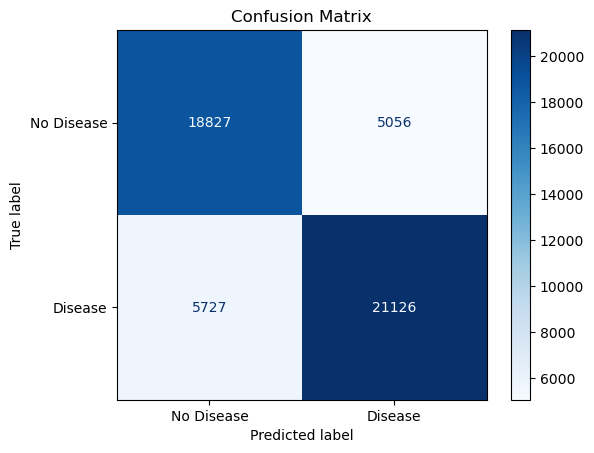

In [59]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()


From above Logistic regression and confusion matrix we see that:

Accuracy: 78.7% of predictions are correct.
Precision: 80.7% of Disease predictions were accurate.
Recall: 78.7% of actual Disease cases were identified.

This indicates a strong model with good precision, but there's room to improve recall by reducing false negatives.

- **Based on the MVP model's performance, which achieved an accuracy of 78.7%, the model demonstrates a strong ability to correctly classify both Disease and No Disease cases. 
- With a precision of 80.7% for detecting Disease and a recall of 78.7% for identifying true positive cases, the model performs well in distinguishing between the two classes.
 - While the results are promising, there is potential for further improvement, particularly in reducing false negatives to enhance recall. Overall, the model offers a reliable foundation for predicting disease outcomes, suitable for use in real-world applications with some fine-tuning.**